In [13]:
import pipeline
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)  

In [2]:
# Read the config file
cfg = pipeline.read_config('config.yaml')

Successfully loaded!


In [11]:
cfg

{'datafile': 'data/projects_2012_2013.csv',
 'outcome_var': 'fullyfunded_within_60days',
 'parameters': {'LR': {'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']},
  'NN': {'n_neighbors': [1, 9]},
  'DT': {'max_depth': [1, 10]},
  'SVM': {'kernel': ['linear'],
   'C': [0.001, 1],
   'probability': [True],
   'random_state': 0},
  'RF': {'max_depth': [1, 50],
   'n_estimators': [10, 100],
   'max_features': [1, 0.75, 0.5]}}}

## 1. Read Data

In [4]:
df = pipeline.read_data(cfg['datafile'])

############################################################

Load Successful!
Data Shape: (124976, 25)

Descritive Statistics:

       school_ncesid  school_latitude  school_longitude  \
count  1.157430e+05   124976.000000    124976.000000      
mean   2.448448e+11   36.827284       -95.859299          
std    1.644728e+11   4.963669         18.392876          
min    1.000050e+10   18.249140       -171.690554         
25%    6.344101e+10   33.872504       -117.806418         
50%    2.200870e+11   36.617410       -90.101563          
75%    3.704880e+11   40.676156       -80.713740          
max    6.100010e+11   65.672562       -66.628036          

       total_price_including_optional_support  students_reached  
count  124976.000000                           124917.000000     
mean   654.011811                              95.445760         
std    1098.015854                             163.481912        
min    92.000000                               1.000000          
25%    34

In [5]:
time_columns = ['date_posted', 'datefullyfunded']
pipeline.generate_time_label(df, time_columns, '%m/%d/%y', cfg['outcome_var'])

In [6]:
df.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,fullyfunded_within_60days
projectid,,,,,,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,f,f,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,2013-04-14,2013-05-02,1
0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,f,f,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,2012-04-07,2012-04-18,1
000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,2012-01-30,2012-04-15,0
0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,2012-10-11,2012-12-05,1
0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,f,f,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,2013-01-08,2013-03-25,0


## Explore Data

Percentage of values in date_posted:

2012-09-30    0.005825
2013-09-01    0.005473
2013-09-03    0.005305
2012-01-30    0.005121
2013-10-06    0.004793
2013-10-20    0.004769
2012-10-07    0.004657
2012-01-15    0.004593
2013-10-27    0.004393
2012-01-21    0.004265
2013-09-08    0.004233
2012-01-29    0.004201
2012-02-12    0.004201
2013-09-22    0.004201
2012-09-02    0.004137
2013-08-23    0.004033
2012-10-21    0.004017
2013-08-25    0.003961
2013-08-11    0.003945
2012-02-01    0.003929
2012-11-04    0.003753
2012-09-08    0.003745
2013-10-12    0.003745
2012-10-06    0.003697
2013-11-16    0.003657
2012-10-15    0.003649
2012-02-19    0.003641
2013-09-15    0.003585
2013-11-15    0.003561
2013-11-10    0.003561
                ...   
2012-07-06    0.000248
2012-03-28    0.000240
2012-06-28    0.000240
2013-02-20    0.000232
2013-01-04    0.000232
2013-07-02    0.000224
2012-05-29    0.000224
2012-06-13    0.000216
2012-07-09    0.000216
2012-08-08    0.000216
2013-12-20    0.000

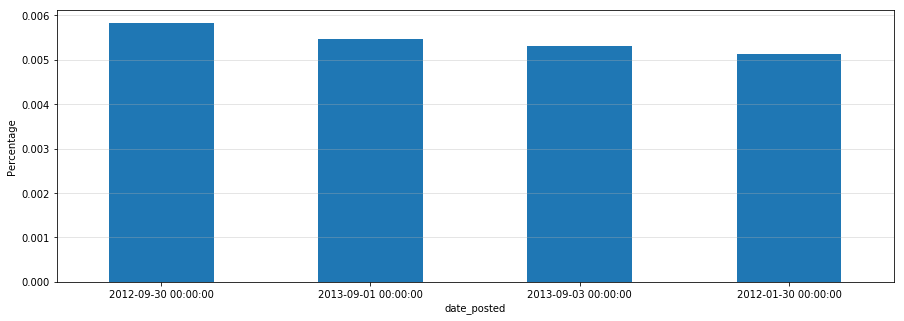

In [20]:
pipeline.view_variable_freq(df, 'date_posted')

### Missing Data

Next, we will analyze missing data. Specifically, we will look to see if any of the features have any missing data and if so, if there are any patterns.

                           NaN  Percent of NaN
secondary_focus_subject  40556  32.45         
secondary_focus_area     40556  32.45         
school_metro             15224  12.18         
school_ncesid            9233   7.39          
school_district          172    0.14          
students_reached         59     0.05          
primary_focus_subject    15     0.01          
resource_type            17     0.01          
primary_focus_area       15     0.01          
grade_level              3      0.00          

################################################################

The following features have missing values:
['secondary_focus_subject', 'secondary_focus_area', 'school_metro', 'school_ncesid', 'school_district', 'students_reached', 'primary_focus_subject', 'resource_type', 'primary_focus_area', 'grade_level']

- secondary_focus_subject has 40556 missing values, which are 32.45% of the entire data

- secondary_focus_area has 40556 missing values, which are 32.45% of the entire

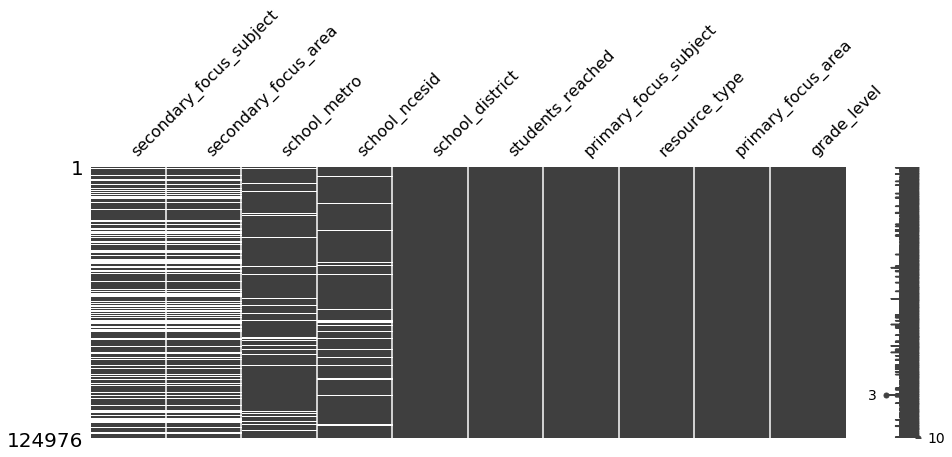

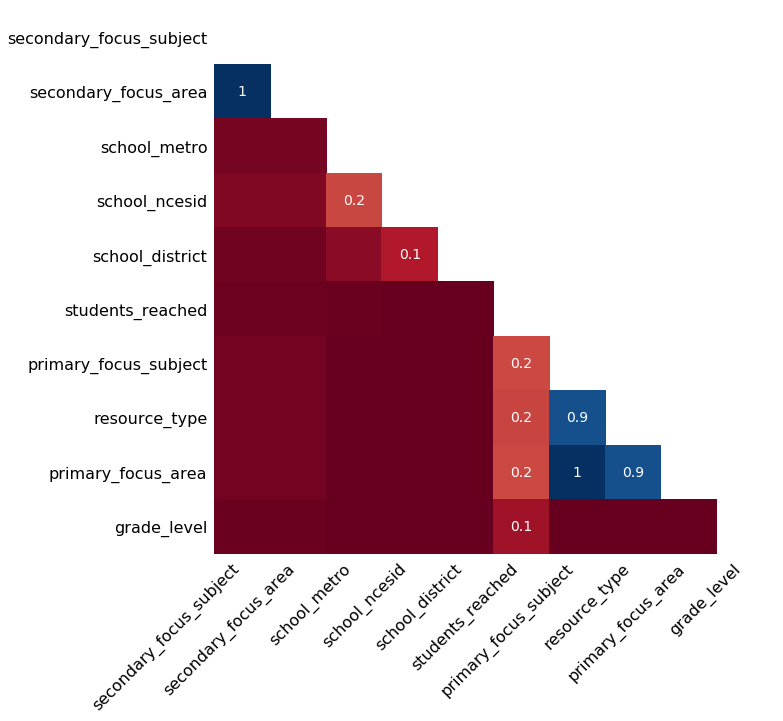

In [9]:
nan_vars = pipeline.analyze_missing_data(df)

The heatmap shows the following pairs of features have exactly same missing data patterns:
- __*secondary_focus_subject*__ & __*secondary_focus_area*__
- __*primary_focus_subject*__ & __*primary_focus_area*__


In [10]:
df.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,fullyfunded_within_60days
projectid,,,,,,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,f,f,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,2013-04-14,2013-05-02,1
0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,f,f,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,2012-04-07,2012-04-18,1
000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,2012-01-30,2012-04-15,0
0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,2012-10-11,2012-12-05,1
0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,f,f,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,2013-01-08,2013-03-25,0
